# **[과제] 다음 X값을 넣고 Y, 즉 렌탈료를 예측해보시기 바랍니다 (15분)**
* **사용모델은 모든 인자를 포함합니다.**
* **더미변수화와 스케일링을 모두 포함합니다.**
* **위의 코드를 활용해보세요 **
* 데이터는 다음과 같습니다. (주의: 변수인 Dist가 빠졌습니다.)

* 'office':[0], 'home':[4.1], 'station':[0], 'co2':[1.8], 'room' : [10.9],'age':[15.1], 'pop':[1.38], 'road':[17], 'mange':[282], 'kid':[16.77] }

* 1) 수업날짜_본인이름.ipynb (예: 0302_김OO.ipynb)
* 2) 스노우에 입력 (필수) baemsu@sookmyung.ac.kr 로 파일 송부(옵션)
* 3) 기한: 매주 해당 수업 수강 이후 24h 이내

In [1]:
#라이브러리들을 불러온다
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("5.Shop_rental.csv")
data.head()

,dist,office,home,station,co2,room,age,pop,road,mange,kid,rental
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2


In [3]:
# 신규데이터 예측을 위해 'dist'변수 제거
data = data.drop(columns = ['dist'])
data.head()

,office,home,station,co2,room,age,pop,road,mange,kid,rental
0,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,4.98,24.0
1,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,9.14,21.6
2,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,4.03,34.7
3,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,2.94,33.4
4,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,5.33,36.2


In [4]:
#1 단계: 더미변수화(범주형데이터)
dummy_var = ['station']

for dum in dummy_var:
  dummies = pd.get_dummies(data[dum], prefix=dum, drop_first=False)
  new_data = pd.concat([data, dummies], axis=1)

new_data.drop(columns = "station", inplace = True)
new_data.head()

,office,home,co2,room,age,pop,road,mange,kid,rental,station_0,station_1
0,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,4.98,24.0,1,0
1,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,9.14,21.6,1,0
2,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,4.03,34.7,1,0
3,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,2.94,33.4,1,0
4,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,5.33,36.2,1,0


In [5]:
#2단계: X, Y분류 
X = new_data.drop('rental', axis=1)
y = new_data['rental']

In [6]:
#3단계: 학습과 검증 데이터 분류

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
#4단계: x에 대한 스케일링 (단위 통일)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x) # fit( )을 수행하면 min과 max의 범위를 정하게 됩니다. 
X_train_transformed = scaler.transform(train_x)

In [8]:
train_x.shape

(354, 11)

In [9]:
X_train_transformed.shape

(354, 11)

In [10]:
#5단계: 모델생성 및 학습

from sklearn.linear_model import LinearRegression

model_scale = LinearRegression()
model_scale.fit(X_train_transformed, train_y)

LinearRegression()

In [11]:
#6단계: 테스트셋을 통한 예측 (이를 위해 test set도 train 으로 스케일링한 것으로 진행)

X_test_transformed = scaler.transform(test_x)
test_pred = model_scale.predict(X_test_transformed)

In [12]:
#7단계: 평가하기

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("mean_squared_error : ", mean_squared_error(test_y, test_pred, squared=False))
print("r2_score : ",r2_score(test_y, test_pred))

mean_squared_error :  4.8927442892585296
r2_score :  0.7388131510300964


In [13]:
#8단계: 신규로 들어온 데이터로 예측하기

#신규데이터
new_x = {}
new_x= {'office':[0], 'home':[4.1], 'station':[0], 'co2':[1.8], 'room' : [10.9],'age':[15.1], 'pop':[1.38], 'road':[17], 'mange':[282], 'kid':[16.77] }
new_x_df = pd.DataFrame(new_x)
new_x_df

data_new=pd.concat([data,new_x_df],ignore_index = True)

print(data_new.tail())

dummy_var = ['station']

for dum in dummy_var:
  dummies = pd.get_dummies(data_new[dum], prefix=dum, drop_first=False)
  new_x_df = pd.concat([data_new, dummies], axis=1)

new_x_df = new_x_df.drop(columns = ["station","rental"])
new_x_df = new_x_df.tail(1)
new_x_df

     office   home  station    co2    room   age     pop  road  mange    kid  \
502     0.0  11.93        0  0.573   6.120  76.7  2.2875     1    273   9.08   
503     0.0  11.93        0  0.573   6.976  91.0  2.1675     1    273   5.64   
504     0.0  11.93        0  0.573   6.794  89.3  2.3889     1    273   6.48   
505     0.0  11.93        0  0.573   6.030  80.8  2.5050     1    273   7.88   
506     0.0   4.10        0  1.800  10.900  15.1  1.3800    17    282  16.77   

     rental  
502    20.6  
503    23.9  
504    22.0  
505    11.9  
506     NaN  


,office,home,co2,room,age,pop,road,mange,kid,station_0,station_1
506,0.0,4.1,1.8,10.9,15.1,1.38,17,282,16.77,1,0


In [14]:
#위의 신규데이터를 스케일링한후 이를 가지고 예측해보기
X_new_transformed = scaler.transform(new_x_df)
new_pred = model_scale.predict(X_new_transformed)
new_pred

array([25.6681528])

Feature: office, Score: 9.43615118654331
Feature: home, Score: 0.31799737287946694
Feature: co2, Score: -5.995595704028863
Feature: room, Score: 17.169725259700744
Feature: age, Score: -0.18196241547753345
Feature: pop, Score: -18.12261052673266
Feature: road, Score: 3.7595862998938347
Feature: mange, Score: -7.77836123708018
Feature: kid, Score: -23.023594112605842
Feature: station_0, Score: -1.455294379529547
Feature: station_1, Score: 1.4552943795295463


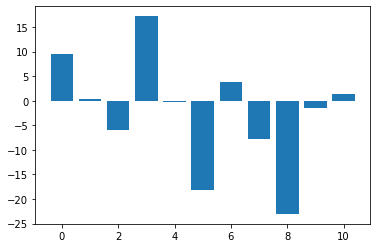

In [15]:
#9단계: 어떤 Feature가 중요한지 보기

# feature 중요도 도출하기

from matplotlib import pyplot

feature_name = X.columns
importance = model_scale.coef_


# summarize feature importance
for i,v in enumerate(importance):
  
  print(f'Feature: {feature_name[i]}, Score: {v}' )

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [16]:
# test preiction 데이터프레임 만들어 보기 좋게 만들기
df_test = test_x.copy()
df_test["rental_pred"] = test_pred
df_test["rental_real"] = test_y

df_test

,office,home,co2,room,age,pop,road,mange,kid,station_0,station_1,rental_pred,rental_real
307,33.0,2.18,0.472,6.849,70.3,3.1827,7,222,7.53,1,0,33.864193,28.2
343,55.0,3.78,0.484,6.696,56.4,5.7321,5,370,7.18,1,0,28.831468,23.9
47,0.0,6.91,0.448,6.030,85.5,5.6894,3,233,18.80,1,0,16.269632,16.6
67,12.5,6.07,0.409,5.878,21.4,6.4980,4,345,8.10,1,0,21.510676,22.0
362,0.0,18.10,0.770,5.362,96.2,2.1036,24,666,10.19,1,0,18.593792,20.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,18.10,0.584,6.003,94.5,2.5403,24,666,21.32,1,0,15.209829,19.1
95,0.0,2.89,0.445,6.625,57.8,3.4952,2,276,6.65,1,0,28.804091,28.4
122,0.0,25.65,0.581,5.961,92.9,2.0869,2,188,17.93,1,0,21.600061,20.5
260,20.0,3.97,0.647,7.203,81.8,2.1121,5,264,9.59,1,0,31.147005,33.8


In [17]:
df_test.shape

(152, 13)

In [18]:
check = df_test.loc[502]
check

office           0.000000
home            11.930000
co2              0.573000
room             6.120000
age             76.700000
pop              2.287500
road             1.000000
mange          273.000000
kid              9.080000
station_0        1.000000
station_1        0.000000
rental_pred     25.959951
rental_real     20.600000
Name: 502, dtype: float64